<a href="https://colab.research.google.com/github/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/IA/lab04/dicasDePreprocessamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2. Aprendizagem de máquina

### Objetivos

  - Dicas de pré-processamento de dados 
  - Entender e praticar a normalização dos dados
  - Entender e praticar codificação Label Encoder e One Hot Encoder.
  - Redução de dimensionalidade: PCA

## Pré-processamento 

Nesta etapa estamos interessados em tratar os dados que servirão de entrada do nosso modelo de Machine Learning seja ele predição, agrupamento ou classificação. Existem diversas técnicas que podem (e devem) ser aplicadas, já conhecemos algumas e hoje veremos outras técnicas.


## Normalização de dados

O conceito de normalização é simples, a idéia é deixar os dados todos na mesma ordem de grandeza, desta forma evita-se gerar discrepâncias entre os atributos (colunas).  

Os métodos mais populares são:

- Normalização Min-Máx: transforma os dados em um escala linear entre 0 e 1
- Normalização de pontuação Z: Escala de dados com base na média e desvio padrão (tambem chamado de padronização)
- Dimensionamento decimal: Dimensiona os dados movendo o ponto decimal do atributo (muito utilizado em sistemas embarcados). 



Exemplo: Vamos criar um lista com 3 atributos e vamos normalizar. 

- Atributos:
  - altura (cm)
  - massa (Kg)
  - idade (anos)

In [47]:
import numpy as np
import pandas as pd

cols = ['altura (cm)', 'massa (kg)', 'idade (anos)']
df = pd.DataFrame(np.array([
                            [170, 90, 20], # altura (cm), massa (Kg), idade (anos)
                            [168, 55, 33],
                            [173, 84, 57],
                            [189, 98, 41]
                        ]),columns=cols)

df.head()                  

,altura (cm),massa (kg),idade (anos)
0,170,90,20
1,168,55,33
2,173,84,57
3,189,98,41


No nosso exemplo vamos usar o método min-máx:

$$
valor_{normalizado}=\dfrac{valor - min_{valores}}{(max_{valores} - min_{valores})}(max_{feature_range} - min_{feature_range}) + min_{feature_range}
$$


In [48]:
from sklearn.preprocessing import MinMaxScaler

#Cria o objeto da classe MinMaxScaler
scaler_minmax = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler_minmax.fit_transform(df[cols])

print(scaled_data)

[[0.0952381  0.81395349 0.        ]
 [0.         0.         0.35135135]
 [0.23809524 0.6744186  1.        ]
 [1.         1.         0.56756757]]


Agora que os dados já estão normalizados, podemos aplicar está transformação em novos dados inseridos pelos usuario. Para isso, basta usar a função ``transform()`` do scaler já treinado.

In [49]:
# Dados definidos pelo usuário
novos_dados = pd.DataFrame({'altura (cm)': [180, 90, 30],
                            'massa (kg)': [185, 80, 40],
                            'idade (anos)': [165, 57, 25]})
# Aplicando o scaler nos novos dados
scaled_novos_dados = scaler_minmax.transform(novos_dados)

print(scaled_novos_dados)

[[ 0.57142857  3.02325581  3.91891892]
 [-3.71428571  0.58139535  1.        ]
 [-6.57142857 -0.34883721  0.13513514]]


Outra técnica que podemos utilizar é o ``StandardScaler`` que normaliza valores com média 0 e desvio padrão igual a 1.


In [50]:
cols = ['altura (cm)', 'massa (kg)', 'idade (anos)']
df = pd.DataFrame(np.array([
                            [170, 90, 20], # altura (cm), massa (Kg), idade (anos)
                            [168, 55, 33],
                            [173, 84, 57],
                            [189, 98, 41]
                        ]),columns=cols)

df.head() 

from sklearn.preprocessing import StandardScaler

#Cria o objeto da classe standardScaler
scaler_standard = StandardScaler()

scaled_data = scaler_standard.fit_transform(df[cols])

scaled_data

array([[-0.60412209,  0.50853555, -1.32415683],
       [-0.84577093, -1.648888  , -0.35435183],
       [-0.24164884,  0.13869151,  1.4360574 ],
       [ 1.69154186,  1.00166093,  0.24245125]])

Da mesma forma que o anterior, podemos aplicar está transformação em novos dados inseridos pelos usuario. Para isso, basta usar a função `transform()` do scaler já treinado.

In [51]:
# Dados definidos pelo usuário
novos_dados2 = pd.DataFrame({'altura (cm)': [180, 90, 30],
                            'massa (kg)': [185, 80, 40],
                            'idade (anos)': [165, 57, 25]})
# Aplicando o scaler nos novos dados
scaled_novos_dados2 = scaler_standard.transform(novos_dados2)

print(scaled_novos_dados2)



[[  0.60412209   6.36439947   9.49289895]
 [-10.27007559  -0.10787118   1.4360574 ]
 [-17.51954071  -2.57349809  -0.9511549 ]]


### Aplicando transformações e revertendo a transformação dos dados

Podemos aplicar a transformação nos dados e o método `inverse_transform` é usado para reverter os dados de volta à sua escala original.

In [52]:
# transformações diferentes em no mesmo dataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


cols = ['altura', 'massa', 'idade']
df = pd.DataFrame(np.array([
                            [170, 90, 20], # altura (cm), massa (Kg), idade (anos)
                            [168, 55, 33],
                            [173, 84, 57],
                            [189, 98, 41]
                        ]),columns=cols)

#Cria o objeto da classe standardScaler e MinMaxScaler
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler(feature_range=(0,1))

# Aplica as transformações
scaled_standard = scaler_standard.fit_transform(df[['altura']])
scaled_minmax = scaler_minmax.fit_transform(df[['massa']])

# atualiza o valor e mostra o resultado
df[['altura']] = scaled_standard
df[['massa']] = scaled_minmax


print("Dados transformados:")
print(df.head())

# Reverte as transformações
df[['altura']] = scaler_standard.inverse_transform(df[['altura']])
df[['massa']] = scaler_minmax.inverse_transform(df[['massa']])

print("\nDados revertidos para a escala original:")
print(df.head())

Dados transformados:
     altura     massa  idade
0 -0.604122  0.813953     20
1 -0.845771  0.000000     33
2 -0.241649  0.674419     57
3  1.691542  1.000000     41

Dados revertidos para a escala original:
   altura  massa  idade
0   170.0   90.0     20
1   168.0   55.0     33
2   173.0   84.0     57
3   189.0   98.0     41


## Desafio 1

Vamos praticar com o dataset 'wine' outro clássico do mundo de ml. Aplique essas transformações necessárias aprendidas nos atributos numéricos. 



In [22]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_data = pd.read_csv(url, delimiter=";")

wine_data.head()

### seu código aqui.....



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Codificação de Atributos Categóricos: `Label Encoder` e `One Hot Encoder`

Em diversas situações, nos deparamos com atributos categóricos em nossos conjuntos de dados, ou seja, aqueles que contêm texto em vez de números.

Considere os seguintes exemplos:

- O atributo `cidade`, que pode conter valores como `["cotia","São Paulo","Pouso Alegre"]` que são exemplos de nomes de cidades;
- O atributo `qualificação profissional`, que pode ter valores como `["junior","Pleno","Senior"]` indicando níveis hierárquicos de cargos. 

Para trabalhar com aprendizado de máquina, manter esses atributos em formato de texto pode não ser a abordagem mais adequada. Por isso, uma alternativa é converter esses textos em valores numéricos. Vamos explorar algumas técnicas para realizar essa conversão.

### Label Encoder 

O Label Encoder é uma técnica simples para converter atributos categóricos de texto para números, associando um valor numérico único a cada texto distinto do atributo.

- Exemplo:

    ["cotia","São Paulo","Pouso Alegre"] == [0,2,1]

    ["junior","Pleno","Senior"] == [0,1,2]

Observação: Note que os indices estão em `ordem alfabética`. 


In [39]:
import numpy as np
import pandas as pd

cols = ['altura(cm)', 'massa(kg)', 'qualificacao']
df = pd.DataFrame(np.array([
    [170, 90, "junior"],
    [168, 55, "pleno"],
    [173, 84, "junior"],
    [189, 98, "senior"]
]), columns=cols)

df.head()

,altura(cm),massa(kg),qualificacao
0,170,90,junior
1,168,55,pleno
2,173,84,junior
3,189,98,senior


In [40]:
from sklearn.preprocessing import LabelEncoder

# Cria o objeto LabelEncoder
labelencoder = LabelEncoder()

# Converte a coluna 'qualificacao' para string e ajusta os dados categóricos
df['qualificacao'] = df['qualificacao'].astype(str)
labelencoder.fit(df['qualificacao'])

# Aplica a transformação dos dados categóricos
df['qualificacao'] = labelencoder.transform(df['qualificacao'])

### uma alternativa é usar o comando abaixo
# Ajusta e transforma os dados categóricos no mesmo comando
# df['qualificacao'] = df['qualificacao'].astype(str)
# df['qualificacao'] = labelencoder.fit_transform(df['qualificacao'])

df.head()

,altura(cm),massa(kg),qualificacao
0,170,90,0
1,168,55,1
2,173,84,0
3,189,98,2


In [41]:
# Novos dados para codificação
novos_dados2 = pd.DataFrame({'qualificacao': ["junior", "pleno", "junior", "senior", "senior"]})
encoded_data = labelencoder.transform(novos_dados2['qualificacao'])

print('Qualificação codificada:', encoded_data)

# Para voltar aos atributos originais
print('Qualificação decodificada:', labelencoder.inverse_transform(encoded_data))


Qualificação codificada: [0 1 0 2 2]
Qualificação decodificada: ['junior' 'pleno' 'junior' 'senior' 'senior']


### Dicas 

O problema surge quando diferentes números na mesma coluna levam o modelo a interpretar erroneamente os dados como se estivessem em uma ordem específica, por exemplo, 0 < 1 < 2.

Como desenvolvedor, é crucial estar ciente dessa questão e avaliar se a ordenação faz sentido para o contexto. Por exemplo, para o atributo qualificação, a ordenação pode não ser problemática. No entanto, para atributos como gênero ou estado, onde não existe uma ordem natural, a utilização do Label Encoder pode ser inadequada.

Nesses casos, o One Hot Encoder pode ser uma alternativa útil, pois cria variáveis binárias para cada categoria, evitando assim a implicação de uma ordem entre elas.

### One Hot Encoder

Podemos associar cada valor de um atribuco como uma nova coluna e preencher com 0 ou 1 o valor desta coluna, é desta forma que o one hot encoder funciona. 

- Exemplo:

In [53]:
import numpy as np
import pandas as pd

cols = ['altura (cm)', 'massa (kg)', 'qualificacao']
df = pd.DataFrame(np.array([
                            [170, 90, "junior"], # altura (cm), massa (Kg), gênero (f/m)
                            [168, 55, "pleno"],
                            [173, 84, "junior"],
                            [189, 98, "senior"]
                        ]),columns=cols)

df.head()

,altura (cm),massa (kg),qualificacao
0,170,90,junior
1,168,55,pleno
2,173,84,junior
3,189,98,senior


In [54]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

ponte_ohe = ohe.fit_transform(df[['qualificacao']]).toarray()

ponte_ohe

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [55]:
#transforma o o np.arry em um dataframe
ponte_ohe = pd.DataFrame(ponte_ohe,columns=["qualificacao"+str(int(i)) for i in range(df.shape[1])])

#adiciona as novas colunas ao dataframe original
df = pd.concat([df,ponte_ohe], axis=1)

df.head()

,altura (cm),massa (kg),qualificacao,qualificacao0,qualificacao1,qualificacao2
0,170,90,junior,1.0,0.0,0.0
1,168,55,pleno,0.0,1.0,0.0
2,173,84,junior,1.0,0.0,0.0
3,189,98,senior,0.0,0.0,1.0


In [56]:
# faz o drop da coluna original qualificacao

df = df.drop(["qualificacao"], axis=1)

df.head()

,altura (cm),massa (kg),qualificacao0,qualificacao1,qualificacao2
0,170,90,1.0,0.0,0.0
1,168,55,0.0,1.0,0.0
2,173,84,1.0,0.0,0.0
3,189,98,0.0,0.0,1.0


Note que agora temos a adição de 3 novas colunas, onde cada uma corresponde a uma classificação do atributo ("junior", "pleno", "senior")

## Desafio 2

Vamos avaliar o efeito de transformação de variavel no treinamento de um dataset, para isso:

Treine e avalie `duas vezes` o classificador kNN para o dataset Wine. 

Considere como dados de entrada apenas as colunas 'Flavanoids’ e 'Proline’. 

Compare o efeito da normalização na avaliação do classificador. Use k = 5.

In [69]:
##### seu código aqui........








## Redução de dimensionalidade 

- Para o bom desempenho da tarefa de classificação é importante um conjunto suficientemente grande de atributos.
  - Em muitos casos, especialmente quando se trabalha diretamente com os pixels das imagens, a informação necessária para a classificação de padrões está espalhada por praticamente todos os atributos
- No entanto, um número muito grande de atributos atrapalha o desempenho dos classificadores, num efeito conhecido como a **maldição da dimensionalidade**, **curse of dimensionality**.
- Frequentemente um número grande de atributos está associado à redundância da informação, ou seja, os valores dos tributos estão fortemente ligados entre si.
  - Por exemplo, nas imagens de dígitos, pixels próximos tendem a ter tonalidades semelhantes
- Uma saída para aproveitar a maior parte da informação espalhada pelos atributos é encontrar uma transformação dos dados que use atributos o tão independentes quanto possível.
  - Dessa forma, alguns atributos terão mais relevância do que outros, pois ao desfazer a interdependência, conseguimos “separar” a informação relevante da informação redundante


### PCA : Principal Component Analysis
(Análise de Componentes Principais)

  * O PCA é uma transformação linear, ou seja, multiplica os vetores de
atributos de entradas de **N** posições por uma matriz com **M**x**N**, com **M** ≤ **N**, resultando em um novo vetor de **N** dimensões

  * O elemento que se destaca é a da variância

  * Essa transformação é obtida por meio dos vetores de treinamento. A redução na dimensionalidade é controlada pelo parâmetro que define a
porcentagem de variabilidade que será mantida nos novos dados

  * No Python, fazemos:

In [57]:
from sklearn.decomposition import PCA

medidas_pca = PCA(0.5).fit_transform(df) # Mantem 50% de variabilidade
print(medidas_pca)

print("shape original: " , df.shape, "shape PCA: " ,  medidas_pca.shape)



[[ -5.81469106]
 [ 27.45356145]
 [ -1.35358402]
 [-20.28528637]]
shape original:  (4, 5) shape PCA:  (4, 1)


  * Cada linha nessa matriz corresponde a uma vetor com **N** dimensões, com um significado especial, denominado de auto-vetor
  * No caso dos vetores serem imagens, essas “auto-imagens” guardam características que serão usadas para identificar as imagens de teste

In [61]:
#Instale os pacotes e faça o download dos arquivos, se ja estiver na pasta não precisa rodar essa celula.

# se `pip3` não funcionar, tente apenas `pip`
!pip3 install --user python-mnist
!pip3 install wget


import wget
wget.download('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz')
wget.download('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz')
wget.download('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz')
wget.download('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz')


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


't10k-labels-idx1-ubyte (1).gz'

## 1 - Gera a matriz de dados de entradas e o vetor de classes alvo para treinamento

Cada linha da matriz de entradas (atributos) contém os pixels da  imagem.

Cada posição do array de rótulos (labels) contém a classe alvo da imgem.

No caso deste dataset, as imagens de trenamento e de teste já estão separadas, e vamos adotar a separação sugerida pelo autor da base de dados.

In [62]:
import time
import numpy as np
# API MNIST
from mnist import MNIST

t0 = time.time()

# Importa os dados do dieretório local
mndata = MNIST('.')
# Habilita abrir arquivos compactados
mndata.gz = True 

# Carrega os dados de treinamento
entradas_treino, classes_treino = mndata.load_training()
# Carrega os dados de treinamento
entradas_teste, classes_teste = mndata.load_testing()

#Transformando em array do numpy
entradas_treino = np.array(entradas_treino)
classes_treino = np.array(classes_treino)
entradas_teste = np.array(entradas_teste)
classes_teste = np.array(classes_teste)

dados_reduzidos = False

print("Tempo para carregamento das imagens: {}s".format(time.time()-t0))

print("Dimensões da matriz dos dados de treinamento: ", entradas_treino.shape)
print("Dimensões da matriz dos dados de teste: ", entradas_teste.shape)


Tempo para carregamento das imagens: 4.33591890335083s
Dimensões da matriz dos dados de treinamento:  (60000, 784)
Dimensões da matriz dos dados de teste:  (10000, 784)


### 1.1 Visualizção de uma imagem

Neste dataset cada imagem está armazenada como uma linha da matriz de entrada.
Para visualizar a imagem que está na linha `i` da matriz, temos que convertê-la novamente em uma matriz quadrada, e usar a biblioteca `matplotlib`

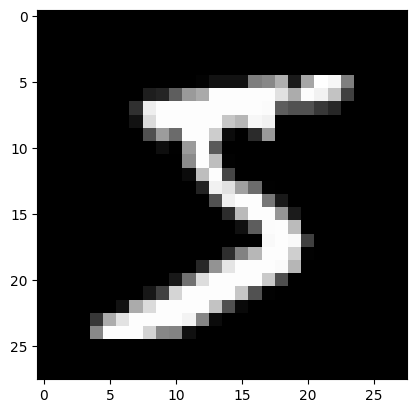

In [63]:
# Função que visualiza a linha lin da matriz
import matplotlib.pyplot as plt
import math
def visualiza_linha_mnist(matriz, lin):
  size = int(math.sqrt(matriz.shape[1]))
  img = np.reshape(matriz[lin], (size, size))
  plt.imshow(img, cmap="gray")
  
# Visualização da linha 0
visualiza_linha_mnist(entradas_treino, 0)
plt.show()

## 2 - Faz a normalização e a redução da dimensionalidade com PCA

Instancia o modelo PCA de forma que 85% da variabilidade de dados seja mantida.
O método `fit_transform(X)` treina o PCA e já traz os dados `X` transformados.
Para reaproveitar o mesmo modelo PCA sem treiná-o novamente, usamos `transform()`.

Uma vez que os dados de treinamento e teste já estão separados,treinamos o normalizador e o PCA com os dados de treinamento, e apenas aplicamos a transformação nos dados de teste.

In [64]:
from sklearn.preprocessing import StandardScaler
# PCA
from sklearn.decomposition import PCA

t0 = time.time()

normalizador = StandardScaler()
redutor_dim = PCA(0.85)   # 85% de variabilidade

entradas_treino_norm = normalizador.fit_transform(entradas_treino)
entradas_treino_norm = redutor_dim.fit_transform(entradas_treino_norm)

entradas_teste_norm = normalizador.transform(entradas_teste)
entradas_teste_norm = redutor_dim.transform(entradas_teste_norm)

print("Tempo para o processamento (normalização + PCA) das imagens: {}s".format(time.time()-t0))
print("Novas dimensoes das matrizes de dados e classes (labels) de treinamento")
print(entradas_treino_norm.shape, entradas_teste_norm.shape)

Tempo para o processamento (normalização + PCA) das imagens: 8.599159002304077s
Novas dimensoes das matrizes de dados e classes (labels) de treinamento
(60000, 185) (10000, 185)


In [65]:
print("Dimensões da matriz dos dados de treinamento: ", entradas_treino.shape)
print("Dimensões da matriz dos dados de teste: ", entradas_teste.shape)
print(28*28)


Dimensões da matriz dos dados de treinamento:  (60000, 784)
Dimensões da matriz dos dados de teste:  (10000, 784)
784


In [66]:
##Avaliação PCA

print (len(entradas_treino_norm), len(entradas_treino_norm))

print ("taxa de variancia explicada: " , len(redutor_dim.explained_variance_ratio_), redutor_dim.explained_variance_ratio_)
print ("valores de cada um dos componentes: ", len(redutor_dim.singular_values_), redutor_dim.singular_values_)

60000 60000
taxa de variancia explicada:  185 [0.05646717 0.04078272 0.0373938  0.02885115 0.02521109 0.0219427
 0.01923344 0.01745799 0.01535092 0.0140172  0.01341743 0.01203742
 0.0111457  0.01089924 0.01028649 0.00994487 0.00936383 0.00921046
 0.00893437 0.00869913 0.00827363 0.00803417 0.00764846 0.00741772
 0.00715293 0.00691847 0.00684136 0.00656675 0.00631677 0.0061292
 0.00596255 0.00587716 0.00571592 0.00562307 0.00554682 0.00538418
 0.00531182 0.00519606 0.00508211 0.00480006 0.00476456 0.00469139
 0.00454349 0.00451346 0.00446963 0.00443383 0.00438215 0.00430382
 0.00426878 0.00423647 0.00404696 0.00399447 0.00397456 0.00393821
 0.00385814 0.00379043 0.00375403 0.00370776 0.00364944 0.00359301
 0.00352382 0.00347794 0.00344411 0.00339868 0.00335955 0.00334886
 0.00331864 0.00323026 0.00316277 0.00313244 0.00310731 0.00307243
 0.00304914 0.00302717 0.00299485 0.00297761 0.00295052 0.00290438
 0.00286856 0.00285678 0.00283398 0.00282627 0.00279551 0.00279305
 0.00278519 0.0027

### 2.1 - Visualização das 16 primairas imagens principais 

O PCA neste caso transforma um array (entrada ou linha da matriz) composta por um conjunto de pixels em um outro array que indica a composição da imagem em termos de "imagens principais"

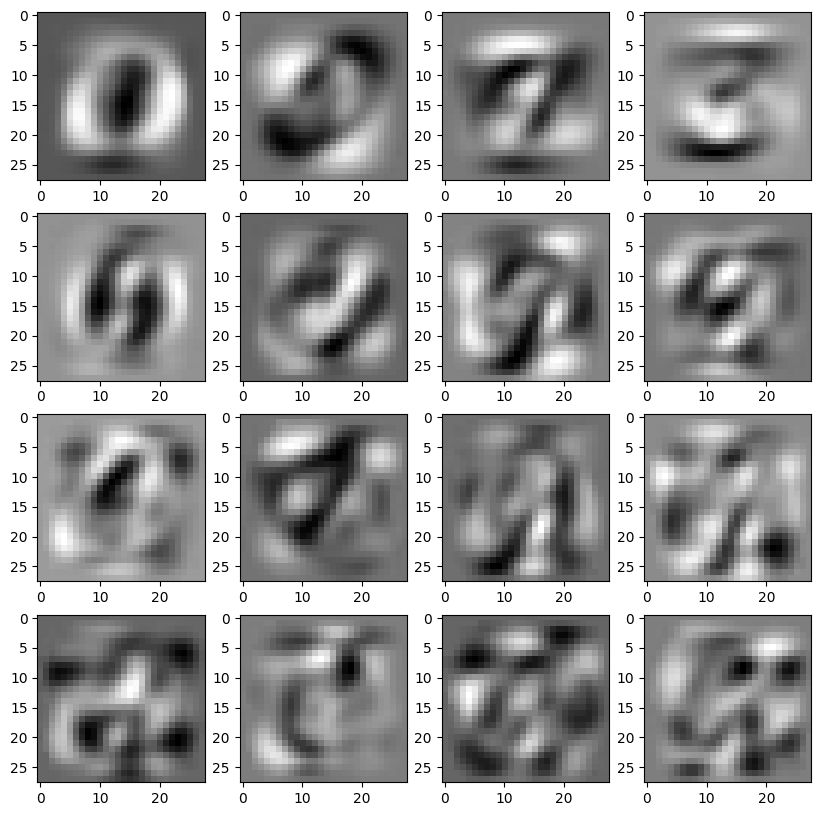

In [67]:
plt.figure(figsize=(10,10))
plt.subplot(4,4,1)
for i in range(4):
  for j in range(4):
    plt.subplot(4,4,i*4+j+1)
    visualiza_linha_mnist(redutor_dim.components_, i*4 + j)
plt.show()

## Desafio 3

Agora é com você termine a implementaçao deste classificador de digitos usando o KNN. Usar as novas matrizes no treinamento, teste e avaliação do classificador 

In [70]:
## Seu código aqui.....





